In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

You will find Q2 regression data from the link above. 
The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 
Note: Please do not use any ML libraries or packages. You can simply attach plot of data points and your regression model that fits the data points and of course, code point (preferably Github).

### Data Exploration

sample data from the excel file


,A,B,C
0,0.490142,-0.179654,11.536508
1,-1.414793,-1.225605,11.828531
2,0.943066,4.506148,-3.235349
3,3.569090,5.068347,-23.891922
4,-1.702460,6.905051,-22.125437


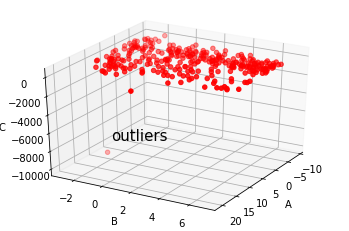

In [2]:
# Original Dataset 
df_ori = pd.read_excel('Adops & Data Scientist Sample Data.xlsx',header=None,sheet_name='Q2 Regression')
df_ori.columns = ['A','B','C']
print("sample data from the excel file")
display(df_ori.head(5))
X_ori = np.array([[1]*len(df_ori['A']),list(df_ori['A']),list(df_ori['B'])]).T
y_ori = np.array(df_ori['C']).reshape(len(df_ori['A']),1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(azim=30)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
ax.text(10,-2,-8500,'outliers',size=15)
ax.scatter(df_ori.A, df_ori.B, df_ori.C,color='r')
plt.show()

In [3]:
print('''[Size of the data] 
The number of data points: {}
The number of features   : {}'''.format(*list(df_ori.shape)))

[Size of the data] 
The number of data points: 300
The number of features   : 3


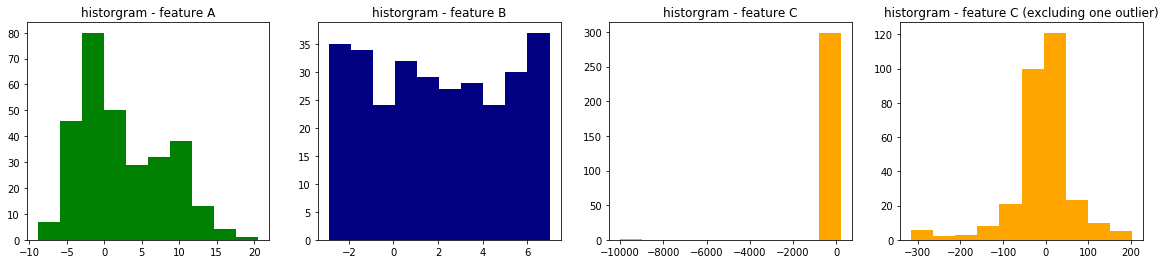

In [4]:
plt.figure(figsize=(20,4))
plt.subplot(141)
plt.title('historgram - feature A')
plt.hist(df_ori.A,color='green')
plt.subplot(142)
plt.title('historgram - feature B')
plt.hist(df_ori.B,color='navy')
plt.subplot(143)
plt.title('historgram - feature C')
plt.hist(df_ori.C,color='orange');
plt.subplot(144)
plt.title('historgram - feature C (excluding one outlier)')
plt.hist(df_ori.C[df_ori.C>-8000],color='orange');
# We can see feature C has outliers through historams below

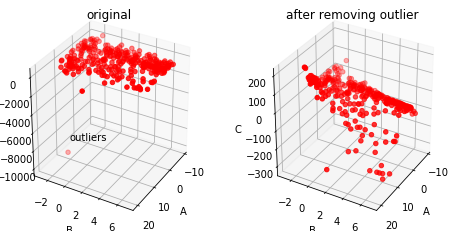

In [5]:
# remove an outlier 
df = df_ori.copy()
df = df[df.C >-9000]

fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.view_init(azim=30)
ax1.set_xlabel('A')
ax1.set_ylabel('B')
ax1.set_zlabel('C')
ax1.set_title('after removing outlier')
ax1.scatter(df.A, df.B, df.C,color='r')

ax2 = fig.add_subplot(1, 2, 1, projection='3d')
ax2.view_init(azim=30)
ax2.set_xlabel('A')
ax2.set_ylabel('B')
ax2.set_zlabel('C')
ax2.text(10,-2,-8500,'outliers',size=10)
ax2.set_title('original')
ax2.scatter(df_ori.A, df_ori.B, df_ori.C,color='r');

In [6]:
# df = df[df.C > -8000]
X = np.array([[1]*len(df['A']),list(df['A']),list(df['B'])]).T
y = np.array(df['C']).reshape(len(df['A']),1)

### Model1: Linear regression

If I choose a linear regression model without any regularization. I can simply use Normal Equation to cacluate the Beta(Thetas) coefficent of the linear model. The problem is time complexity to caculate inverse(X) is with general methods $O(n^{2.4})$ ~ $O(n^{3})$. so as the number of data's features, computation speed gets very slow.  


<b>Method 1. Normal Equation: </b> A Matrix Formulation of the Multiple Variables Regression Model

$Y=X\beta+e$ 

$ Cost(\mathbf \beta) = \| \mathbf e \|^2 = \| \mathbf y - X \mathbf \beta\|^2$(Least Squares)

....

$\beta=(X^{'}X)^{-1}X^{'}Y$


$C=\beta_0+\beta_1A+\beta_2B$


In [7]:
Beta1 = np.linalg.inv(X.T@X)@(X.T)@y

In [8]:
lambdaa = 100
I = np.eye(df.shape[1])
Beta1_ridge=np.linalg.inv(X.T@X + lambdaa*I)@(X.T)@(y)
Beta1_ridge

array([[ 15.47836306],
       [ -0.80942855],
       [-13.35166627]])

In [9]:
xs = np.arange(-10, 3, 0.25)
ys = np.arange(-3, 20, 0.25)
xs,ys = np.meshgrid(xs, ys)
zs1 = Beta1[0][0] + xs*Beta1[1][0]  + ys*Beta1[2][0]
zs1_ridge = Beta1_ridge[0][0] + xs*Beta1_ridge[1][0]  + ys*Beta1_ridge[2][0] 

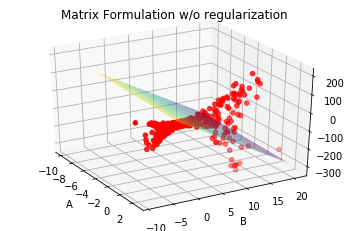

Beta_0:25.74, Beta_1:-1.37, Beta_2:-15.23  
Mean Squre Error: 339408.53 
Mean Squre Error without the outlier: 3074.51 


In [10]:
%matplotlib inline
# Let's plot this regressor
def plot_3d(xs,ys,zs,title):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.view_init(azim=-30)
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('C')
    ax.plot_surface(xs,ys,zs, rstride=1, cstride=1,cmap='viridis', edgecolor='none', alpha=0.5)
    ax.scatter(X[:,0], X[:,1], y,color='r') 
    ax.set_title(title)
    plt.show()
    
mse1=np.mean((X_ori@Beta1 - y_ori)**2) 
mse1wo=np.mean((X@Beta1 - y)**2)
plot_3d(xs,ys,zs1,'Matrix Formulation w/o regularization')
print('Beta_0:{:.2f}, Beta_1:{:.2f}, Beta_2:{:.2f}  '.format(Beta1[0][0],Beta1[1][0],Beta1[2][0]))
print('Mean Squre Error: {:.2f} '.format(mse1))
print('Mean Squre Error without the outlier: {:.2f} '.format(mse1wo))

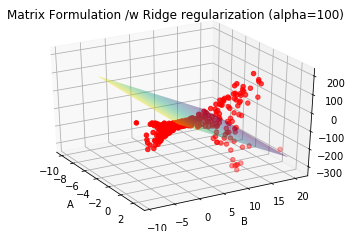

Beta_0:15.48, Beta_1:-0.81, Beta_2:-13.35  
Mean Squre Error: 338880.12 
Mean Squre Error without the outlier: 3136.15 


In [11]:
mse1r=np.mean((X_ori@Beta1_ridge - y_ori)**2)
mse1rwo=np.mean((X@Beta1_ridge - y)**2) 
plot_3d(xs,ys,zs1_ridge,'Matrix Formulation /w Ridge regularization (alpha=100)')
print('Beta_0:{:.2f}, Beta_1:{:.2f}, Beta_2:{:.2f}  '.format(Beta1_ridge[0][0],Beta1_ridge[1][0],Beta1_ridge[2][0]))
print('Mean Squre Error: {:.2f} '.format(mse1r))
print('Mean Squre Error without the outlier: {:.2f} '.format(mse1rwo))

### Model2: 2nd Degree Polynomial regression

<b>Method 2. A Gradient Descent: </b> Gradient Descent for Multiple Variables Linear Regression without regularization
 

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. 

![Image of Gradient Descent](https://miro.medium.com/max/1400/1*G1v2WBigWmNzoMuKOYQV_g.png)


In [12]:
# Add 3rd degree polynomial features 
df_ori['A_2'] = df_ori.A * df_ori.A 
df_ori['AB'] = df_ori.A *  df_ori.B 
df_ori['B_2'] = df_ori.B * df_ori.B 

display(df_ori.head(3))

,A,B,C,A_2,AB,B_2
0,0.490142,-0.179654,11.536508,0.240240,-0.088056,0.032276
1,-1.414793,-1.225605,11.828531,2.001639,1.733977,1.502107
2,0.943066,4.506148,-3.235349,0.889373,4.249593,20.305365


In [16]:
X_ori_poly = np.array([[1]*len(df_ori['A']),list(df_ori['A']),list(df_ori['B']),list(df_ori['A_2']),list(df_ori['AB']),list(df_ori['B_2'])]).T#,list(df_ori['A_3']),list(df_ori['AB2']),list(df_ori['A2B']),list(df_ori['B_3'])]).Ty_ori_poly = np.array(df_ori['C']).reshape(len(df_ori['A']),1)
y_ori_poly = np.array(df_ori['C']).reshape(len(df_ori['A']),1)
df = df_ori[df_ori.C >-8000]
X_poly = np.array([[1]*len(df['A']),list(df['A']),list(df['B']),list(df['A_2']),list(df['AB']),list(df['B_2'])]).T
y_poly = np.array(df['C']).reshape(len(df['A']),1)

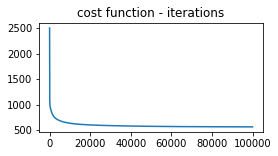

In [17]:
theta = np.zeros([1,df_ori.shape[1]]).T
# learning rate
alpha = 0.00005 
# number of interation
iters = 100000
# regulariation_ind : if we want to penalize the size of coef, put regulariation_index = True and set the lambda (alpha)

#######################################################
def cost_fun(X2,y2,theta2,lamb2):
    se = np.power((X2.dot(theta2)-y2),2)
    reg = lamb2*np.sum(np.square(theta2))
    return (np.sum(se)+reg)/(2 * len(X2))

def regression(X,y,theta,iters,alpha,regulariation_ind,*lambdaa):
    if not regulariation_ind: # if we use just linear regression w/o regularization
        lamb = 0 
    else: lamb = lambdaa[0]
    # gradient descent fitting process
    cost = np.zeros(iters)
    for i in range(iters):
        theta -= (alpha/len(X)) * (X.T@(X@theta - y) + lamb*theta)
        cost[i] = cost_fun(X,y,theta,lamb)
    return theta, cost



Beta3, Cost3= regression(X_poly,y_poly,theta,iters,alpha,False)
zs3 = Beta3[0][0] + xs*Beta3[1][0]  + ys*Beta3[2][0] + xs**2*Beta3[3][0] + xs*ys*Beta3[4][0]+ ys**2*Beta3[5][0] 

plt.figure(figsize=(4,2))
plt.title('cost function - iterations')
plt.plot(range(iters),Cost3);

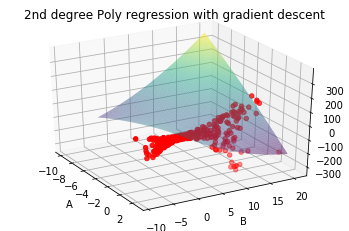

Beta coefficients: [[ 17.65292601   5.9809534  -12.30731021  -0.45304506  -2.70665011
    0.39369359]]
Mean Squre Error: 342614.60 
Mean Squre Error without the outlier: 1128.83 


In [18]:
%matplotlib inline 
mse2=np.mean((X_ori_poly@Beta3 - y_ori_poly)**2)
mse2wo= np.mean((X_poly@Beta3- y_poly)**2)
plot_3d(xs,ys,zs3,'2nd degree Poly regression with gradient descent')
print('Beta coefficients:',Beta3.T)
print('Mean Squre Error: {:.2f} '.format(mse2))
print('Mean Squre Error without the outlier: {:.2f} '.format(mse2wo))

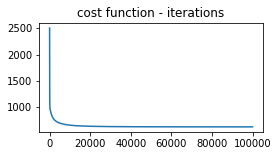

In [19]:
theta = np.zeros([1,df_ori.shape[1]]).T
# learning rate
alpha = 0.00005 
# number of interation
iters = 100000

Beta3, Cost3= regression(X_poly,y_poly,theta,iters,alpha,True,100)
zs3 = Beta3[0][0] + xs*Beta3[1][0]  + ys*Beta3[2][0] + xs**2*Beta3[3][0] + xs*ys*Beta3[4][0]+ ys**2*Beta3[5][0] 

plt.figure(figsize=(4,2))
plt.title('cost function - iterations')
plt.plot(range(iters),Cost3);

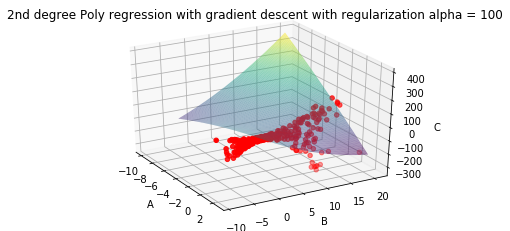

Beta coefficients: [[ 10.77524257   5.76502936 -10.82327461  -0.38636368  -2.75537227
    0.33786084]]
Mean Squre Error: 342331.08 
Mean Squre Error without the outlier: 14.60 


In [20]:
%matplotlib inline 
mse2r=np.mean((X_ori_poly@Beta3 - y_ori_poly)**2)
mse2rwo= np.mean(X_poly@Beta3- y_poly)**2
plot_3d(xs,ys,zs3,'2nd degree Poly regression with gradient descent with regularization alpha = 100')
print('Beta coefficients:',Beta3.T)
print('Mean Squre Error: {:.2f} '.format(mse2r))
print('Mean Squre Error without the outlier: {:.2f} '.format(mse2rwo))

### Model3: 3rd Degree Polynomial regression

In [21]:
# Add 3rd degree polynomial features 
df_ori['A_3'] = df_ori.A * df_ori.A  * df_ori.A 
df_ori['AB2'] = df_ori.A *  df_ori.B * df_ori.B 
df_ori['A2B'] = df_ori.A * df_ori.A * df_ori.B 
df_ori['B_3'] = df_ori.B * df_ori.B *  df_ori.B

display(df_ori.head(3))


,A,B,C,A_2,AB,B_2,A_3,AB2,A2B,B_3
0,0.490142,-0.179654,11.536508,0.240240,-0.088056,0.032276,0.117752,0.015820,-0.043160,-0.005798
1,-1.414793,-1.225605,11.828531,2.001639,1.733977,1.502107,-2.831905,-2.125170,-2.453218,-1.840989
2,0.943066,4.506148,-3.235349,0.889373,4.249593,20.305365,0.838737,19.149292,4.007645,91.498972


In [22]:

X_ori_poly = np.array([[1]*len(df_ori['A']),list(df_ori['A']),list(df_ori['B']),list(df_ori['A_2']),list(df_ori['AB']),list(df_ori['B_2']),list(df_ori['A_3']),list(df_ori['AB2']),list(df_ori['A2B']),list(df_ori['B_3'])]).T
y_ori_poly = np.array(df_ori['C']).reshape(len(df_ori['A']),1)

df = df_ori[df_ori.C >-8000]
X_poly3 = np.array([[1]*len(df['A']),list(df['A']),list(df['B']),list(df['A_2']),list(df['AB']),list(df['B_2']),list(df['A_3']),list(df['AB2']),list(df['A2B']),list(df['B_3'])]).T
y_poly3 = np.array(df['C']).reshape(len(df['A']),1)

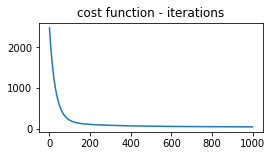

In [23]:
theta = np.zeros([1,df_ori.shape[1]]).T
# learning rate
alpha = 0.0000005 
# number of interation
iters = 1000

Beta4, Cost4= regression(X_poly3,y_poly3,theta,iters,alpha,False)
zs4 = Beta4[0][0] + xs*Beta4[1][0]  + ys*Beta4[2][0] + xs**2*Beta4[3][0] + xs*ys*Beta4[4][0]+ ys**2*Beta4[5][0] + xs**3*Beta4[6][0] + xs*ys**2*Beta4[7][0] + ys*xs**2*Beta4[8][0] + ys**3*Beta4[9][0]
plt.figure(figsize=(4,2))
plt.title('cost function - iterations')
plt.plot(range(iters),Cost4);

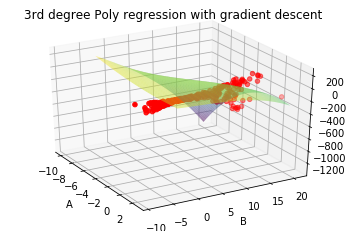

Beta coefficients: [[ 0.00285127  0.01430626 -0.00437915  0.0661827  -0.01471605  0.00496132
   0.00921484  0.04978408 -0.42496236 -0.03471371]]
Mean Squre Error: 341148.43 
Mean Squre Error without the outlier: 28.94 


In [24]:
plot_3d(xs,ys,zs4,'3rd degree Poly regression with gradient descent ')
mse3=np.mean((X_ori_poly@Beta4 - y_ori_poly)**2)
mse3wo= np.mean(X_poly3@Beta4- y_poly3)**2
print('Beta coefficients:',Beta4.T)
print('Mean Squre Error: {:.2f} '.format(mse3))
print('Mean Squre Error without the outlier: {:.2f} '.format(mse3wo))

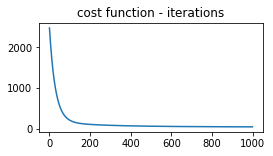

In [25]:
theta = np.zeros([1,df_ori.shape[1]]).T
# learning rate
alpha = 0.0000005 
# number of interation
iters = 1000

Beta4, Cost4= regression(X_poly3,y_poly3,theta,iters,alpha,True,100)
zs4 = Beta4[0][0] + xs*Beta4[1][0]  + ys*Beta4[2][0] + xs**2*Beta4[3][0] + xs*ys*Beta4[4][0]+ ys**2*Beta4[5][0] + xs**3*Beta4[6][0] + xs*ys**2*Beta4[7][0] + ys*xs**2*Beta4[8][0] + ys**3*Beta4[9][0]
plt.figure(figsize=(4,2))
plt.title('cost function - iterations')
plt.plot(range(iters),Cost4);

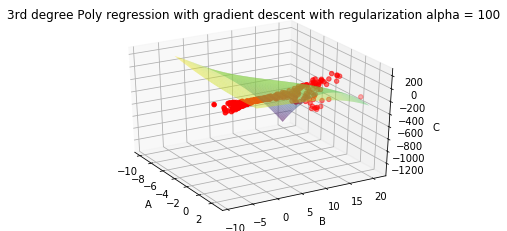

Beta coefficients: [[ 0.00285103  0.01430515 -0.00437905  0.06617704 -0.01471654  0.00496006
   0.00921516  0.04977582 -0.4249541  -0.03471623]]
Mean Squre Error: 341148.43 
Mean Squre Error without the outlier: 28.94 


In [26]:
plot_3d(xs,ys,zs4,'3rd degree Poly regression with gradient descent with regularization alpha = 100')
mse3r=np.mean((X_ori_poly@Beta4 - y_ori_poly)**2)
mse3rwo= np.mean(X_poly3@Beta4- y_poly3)**2
print('Beta coefficients:',Beta4.T)
print('Mean Squre Error: {:.2f} '.format(mse3))
print('Mean Squre Error without the outlier: {:.2f} '.format(mse3wo))

### Model Selection

In [27]:
df_model = pd.DataFrame([['Model1 Linear regression',mse1,mse1wo],['Model1 Linear regression /w Ridge',mse1r,mse1rwo],['Model2 2nd Poly regression',mse2,mse2wo],['Model2 2nd Poly regression /w Ridge',mse2r,mse2rwo],['Model3 3rd Poly regression',mse3,mse3wo],['Model3 3rd Poly regression with Ridge',mse3r,mse3rwo]])
df_model.columns=(['Mode1','MSE','MSE w/o outliers'])


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

# Set CSS properties for td elements in dataframe
td_props = [('font-size', '11px')]
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)]

def color_negative_red(value):
    if value < 15: color = 'red'
    else: color = 'black'
    return 'color: %s' % color


In [29]:
df_model.style.applymap(color_negative_red,
subset=['MSE','MSE w/o outliers']).set_table_styles(styles)

,Mode1,MSE,MSE w/o outliers
0,Model1 Linear regression,339409,3074.51
1,Model1 Linear regression /w Ridge,338880,3136.15
2,Model2 2nd Poly regression,342615,1128.83
3,Model2 2nd Poly regression /w Ridge,342331,14.599
4,Model3 3rd Poly regression,341148,28.9406
5,Model3 3rd Poly regression with Ridge,341148,28.9411


For the final model, 
I would like to choose <b>"Model2 2nd Poly regression /w Ridge" </b>
- Reason1. 2nd degree poly model showed significant MSE drop comparing to MSE of linear models

(to avoid overfitting & penalize the size of coeff, I used Ridge regularization method)
- Reason2. 3rd degree poly model doesn't really MSE drop. (Also It has high risk of overfitting)